In [10]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_squared_log_error,r2_score

In [11]:
data=pd.read_csv('countries of the world.csv',decimal=',')
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [12]:
data.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [13]:
data.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

In [14]:
data.fillna(0.0,inplace=True)

In [15]:
data.isnull().any()

Country                               False
Region                                False
Population                            False
Area (sq. mi.)                        False
Pop. Density (per sq. mi.)            False
Coastline (coast/area ratio)          False
Net migration                         False
Infant mortality (per 1000 births)    False
GDP ($ per capita)                    False
Literacy (%)                          False
Phones (per 1000)                     False
Arable (%)                            False
Crops (%)                             False
Other (%)                             False
Climate                               False
Birthrate                             False
Deathrate                             False
Agriculture                           False
Industry                              False
Service                               False
dtype: bool

In [16]:
df=data

In [17]:
df.isnull().any()

Country                               False
Region                                False
Population                            False
Area (sq. mi.)                        False
Pop. Density (per sq. mi.)            False
Coastline (coast/area ratio)          False
Net migration                         False
Infant mortality (per 1000 births)    False
GDP ($ per capita)                    False
Literacy (%)                          False
Phones (per 1000)                     False
Arable (%)                            False
Crops (%)                             False
Other (%)                             False
Climate                               False
Birthrate                             False
Deathrate                             False
Agriculture                           False
Industry                              False
Service                               False
dtype: bool

Exploratory Data Analysis of the dataset 

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


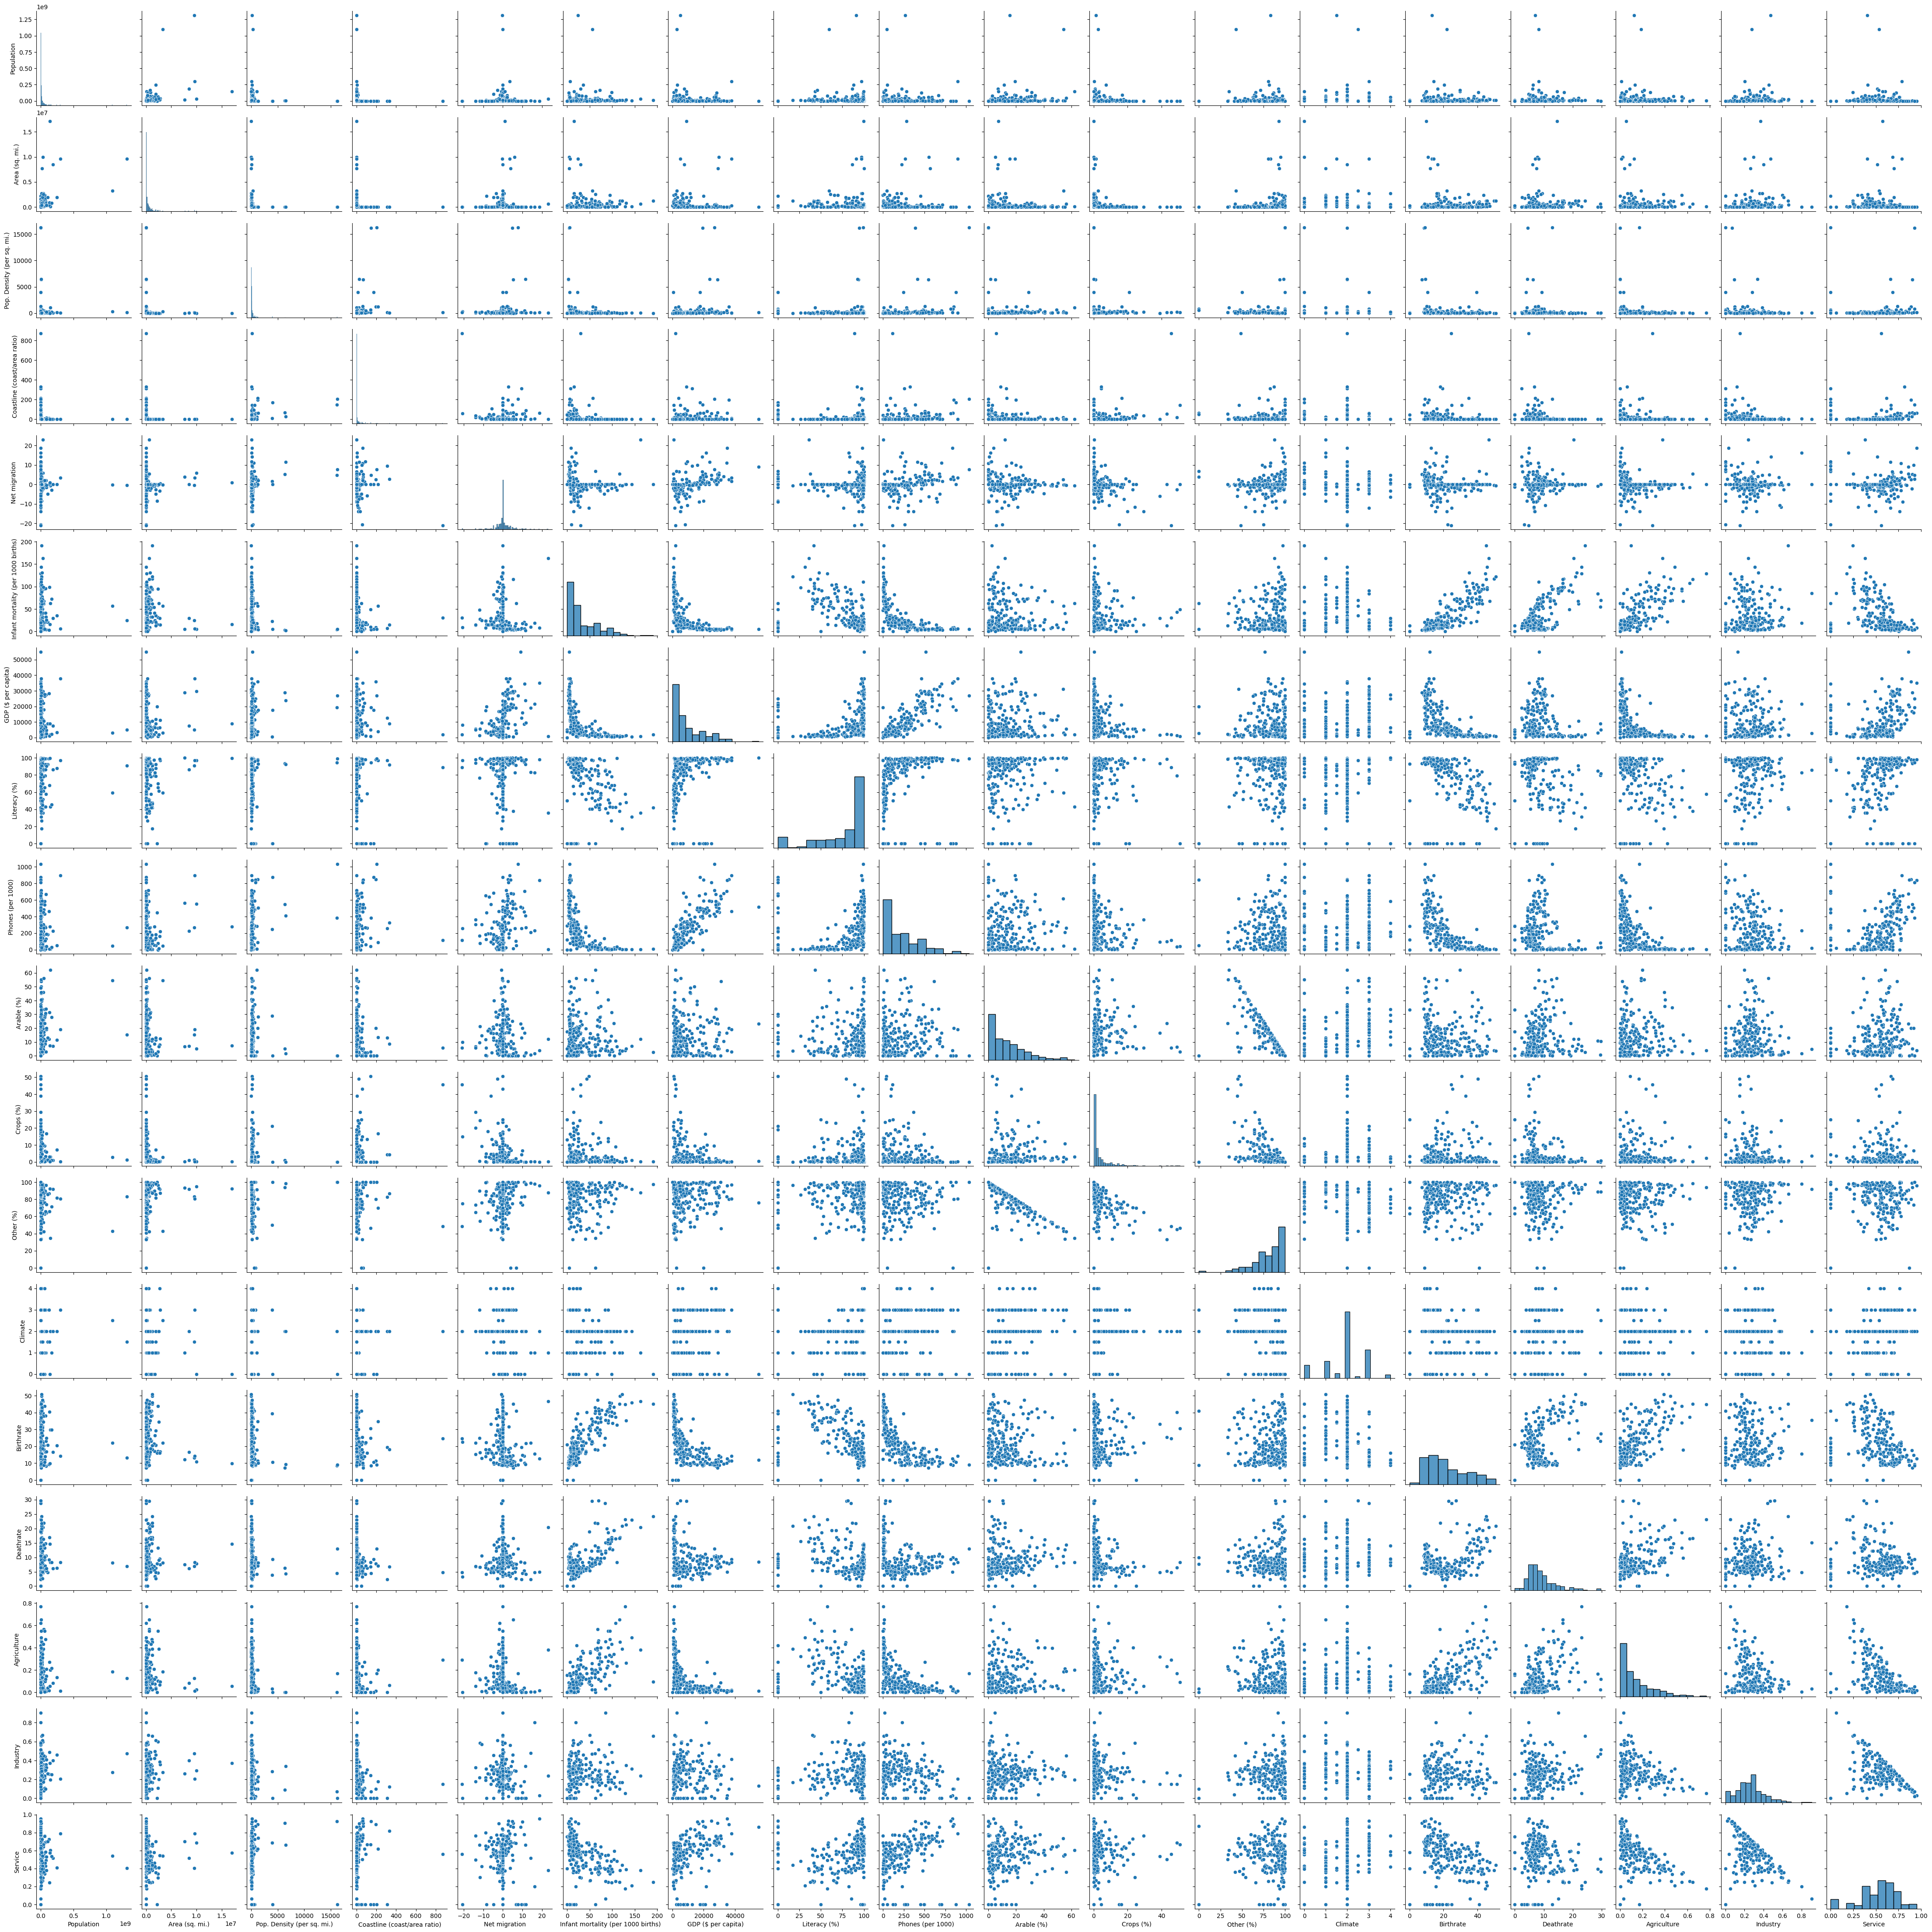

In [18]:
sns.pairplot(data=df)

In [19]:
df.groupby('Region')[['GDP ($ per capita)','Literacy (%)','Agriculture']].median()

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610
BALTICS,11400.0,99.80,0.0400
C.W. OF IND. STATES,3450.0,99.05,0.1980
EASTERN EUROPE,9100.0,98.45,0.0815
LATIN AMER. & CARIB,6300.0,94.00,0.0680
NEAR EAST,9250.0,80.65,0.0350
NORTHERN AFRICA,5000.0,63.85,0.1165
NORTHERN AMERICA,29800.0,97.00,0.0100
OCEANIA,5000.0,93.70,0.0890


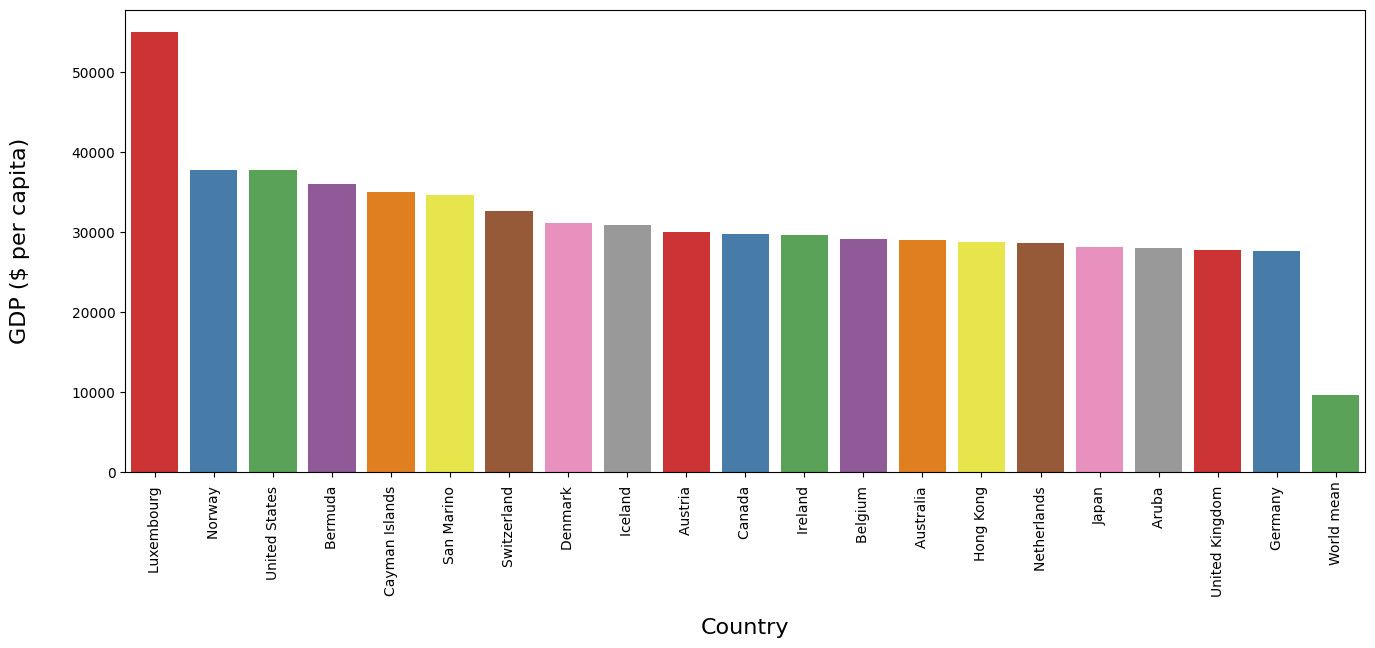

In [20]:
fig,ax=plt.subplots(figsize=(16,6))
top_gdp=df.sort_values('GDP ($ per capita)',ascending=False).head(20)
mean=pd.DataFrame({'Country':['World mean'],'GDP ($ per capita)':[data['GDP ($ per capita)'].mean()]})
gdps=pd.concat([top_gdp[['Country','GDP ($ per capita)']],mean],ignore_index=True)

sns.barplot(x='Country',y='GDP ($ per capita)',data=gdps,palette='Set1')
ax.set_xlabel(ax.get_xlabel(),labelpad=15)
ax.set_ylabel(ax.get_ylabel(),labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()


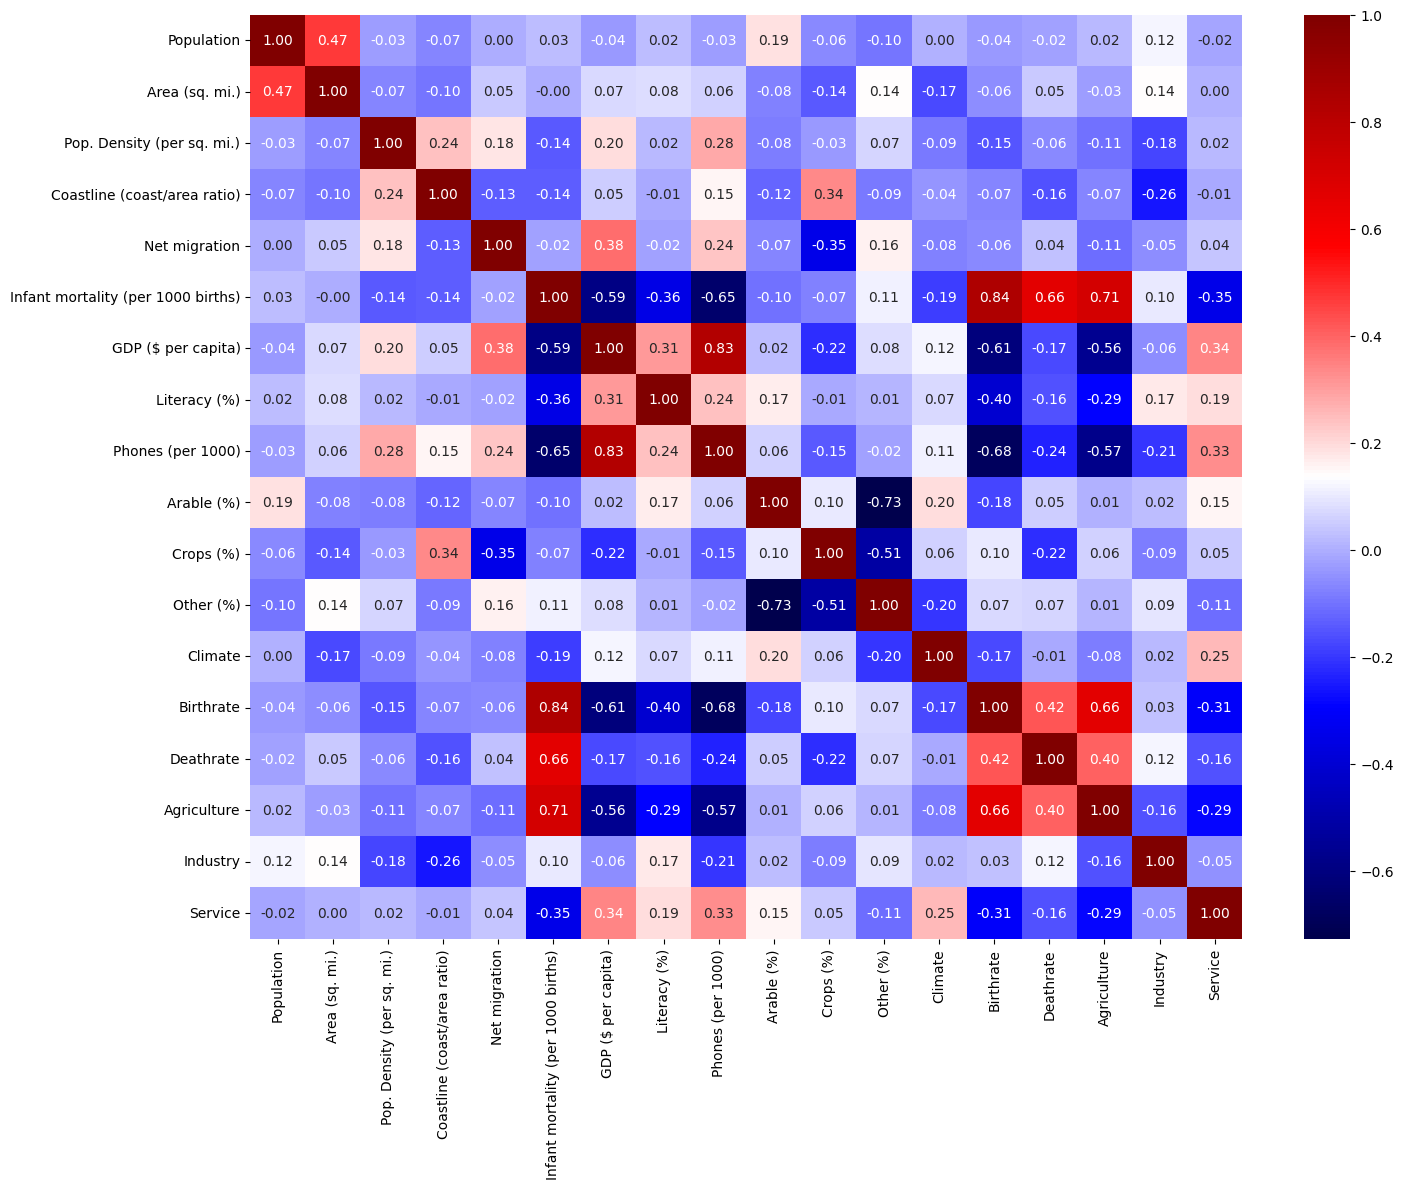

In [21]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='seismic')
plt.show()

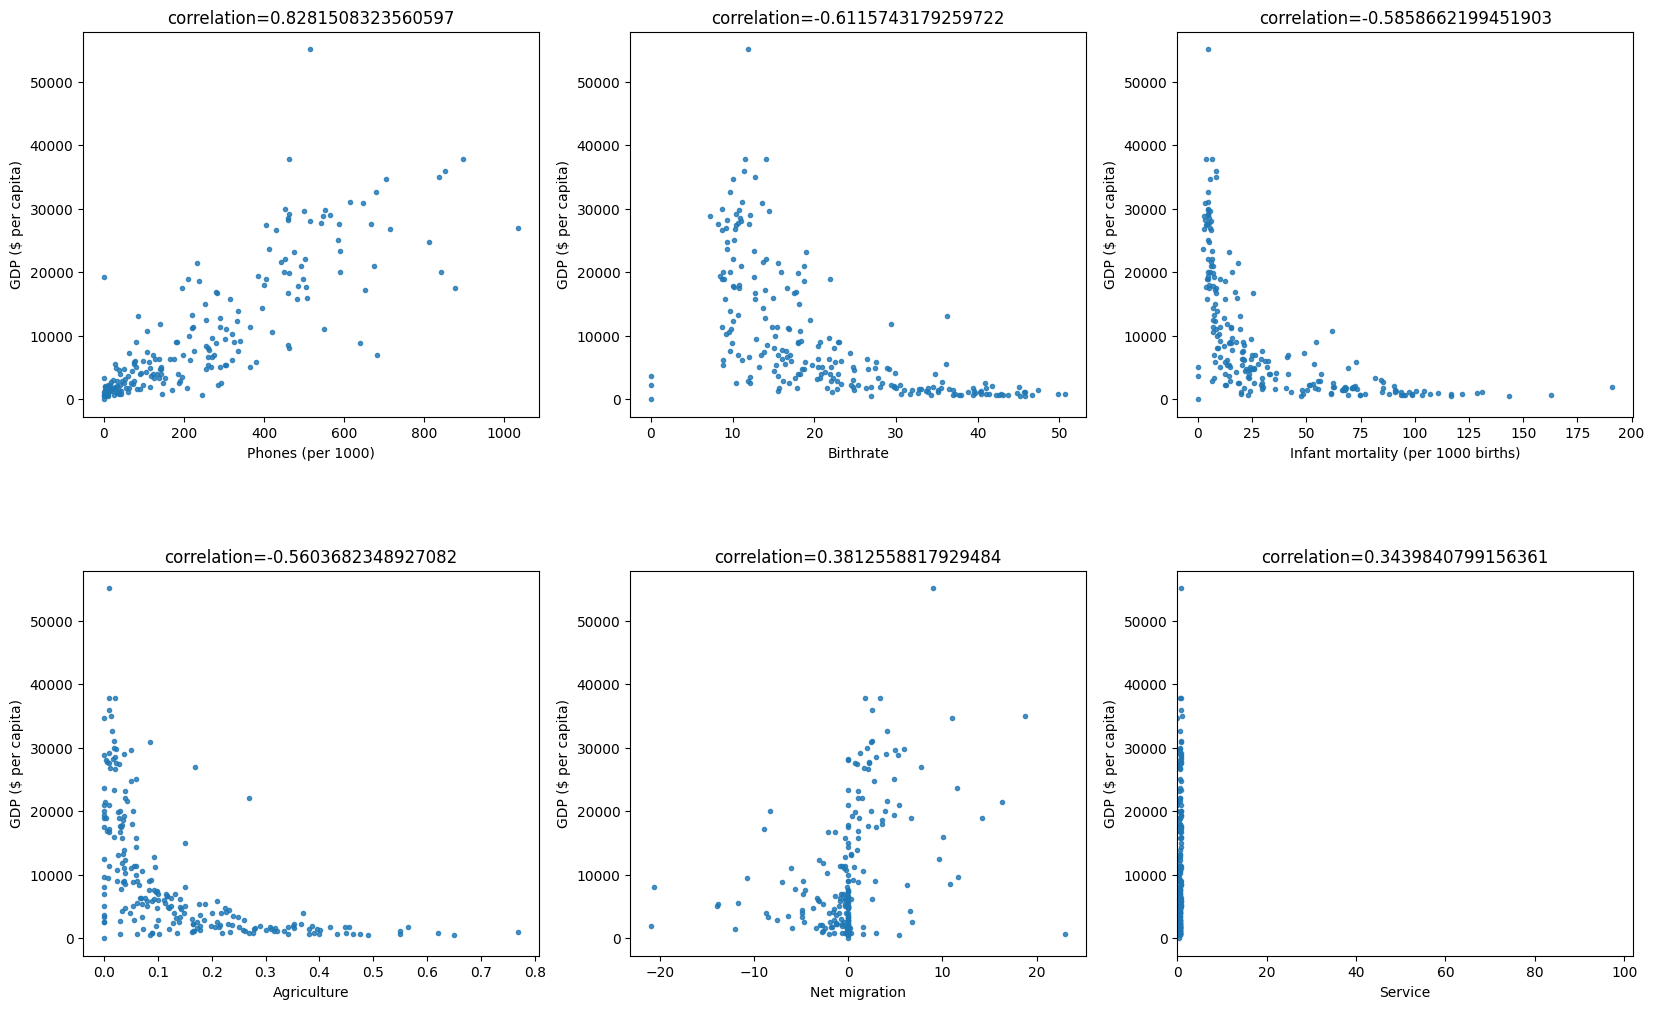

In [22]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(20,12))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp=pd.Series()
for col in data.columns.values[2:]:
    if((col!='GDP ($ per capita)') & (col!='Climate')):
        corr_to_gdp[col]=data['GDP ($ per capita)'].corr(data[col])
abs_corr_to_gdp=corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp=corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j],y='GDP ($ per capita)',data=df,ax=axes[i,j],fit_reg=False,marker='.')
        title='correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

In [23]:
LE=LabelEncoder()
data['Region_label']=LE.fit_transform(data['Region'])
data['Climate_label']=LE.fit_transform(data['Climate'])
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Region_label,Climate_label
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,0,1
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,3,5
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,6,1
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000,8,3
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000,10,5


In [24]:
#Training and testing the data 
train,test=train_test_split(data,test_size=0.3,shuffle=True)
training_features=['Population','Area (sq. mi.)','Pop. Density (per sq. mi.)',	'Coastline (coast/area ratio)',	'Net migration',	'Infant mortality (per 1000 births)',		'Literacy (%)','Phones (per 1000)'	,'Arable (%)'	,'Crops (%)',	'Other (%)',	'Birthrate',	'Deathrate' ,	'Agriculture' ,	'Industry' ,'Service','Region_label','Climate_label','Service']
target='GDP ($ per capita)'
train_X=train[training_features]
train_Y=train[target]
test_X=test[training_features]
test_Y=test[target]

In [25]:
train_X.shape
train_Y.shape

(158,)

In [26]:
test_X.shape
test_Y.shape

(69,)

In [27]:
#linear regression model 
model=LinearRegression()
model.fit(train_X,train_Y)
train_pred_Y=model.predict(train_X)
test_pred_Y=model.predict(test_X)
train_pred_Y=pd.Series(train_pred_Y.clip(0,train_pred_Y.max()),index=train_Y.index)
test_pred_Y=pd.Series(test_pred_Y.clip(0,test_pred_Y.max()),index=test_Y.index)



In [28]:
train_pred_Y.shape



(158,)

In [29]:
test_pred_Y.shape

(69,)

In [30]:
train_Y.shape

(158,)

In [31]:
rmse_train=np.sqrt(mean_squared_error(train_pred_Y,train_Y))
msle_train=mean_squared_log_error(train_pred_Y,train_Y)
rmse_test=np.sqrt(mean_squared_error(train_pred_Y,train_Y))
msle_test=mean_squared_log_error(train_pred_Y,train_Y)

print('rmse_train:',rmse_train,'msle train:',msle_train)
print('rmse test:',rmse_test,'msle test:',msle_test)

rmse_train: 4619.909417106197 msle train: 4.537206654329006
rmse test: 4619.909417106197 msle test: 4.537206654329006


In [34]:
#Random Forest Model
model=RandomForestRegressor(n_estimators=50,
                            max_depth=6,
                            min_weight_fraction_leaf=0.05,
                            max_features=0.8,
                            random_state=42
                            )
model.fit(train_X,train_Y)
train_pred_Y=model.predict(train_X)
test_pred_Y=model.predict(test_X)
train_pred_Y=pd.Series(train_pred_Y.clip(0,train_pred_Y.max()),index=train_Y.index)
test_pred_Y=pd.Series(test_pred_Y.clip(0,test_pred_Y.max()),index=test_Y.index)


rmse_train=np.sqrt(mean_squared_error(train_pred_Y,train_Y))
msle_train=mean_squared_log_error(train_pred_Y,train_Y)
rmse_test=np.sqrt(mean_squared_error(train_pred_Y,train_Y))
msle_test=mean_squared_log_error(train_pred_Y,train_Y)

print('rmse_train:',rmse_train,'msle train:',msle_train)
print('rmse test:',rmse_test,'msle test:',msle_test)


rmse_train: 3370.422207710345 msle train: 0.7177915845717114
rmse test: 3370.422207710345 msle test: 0.7177915845717114


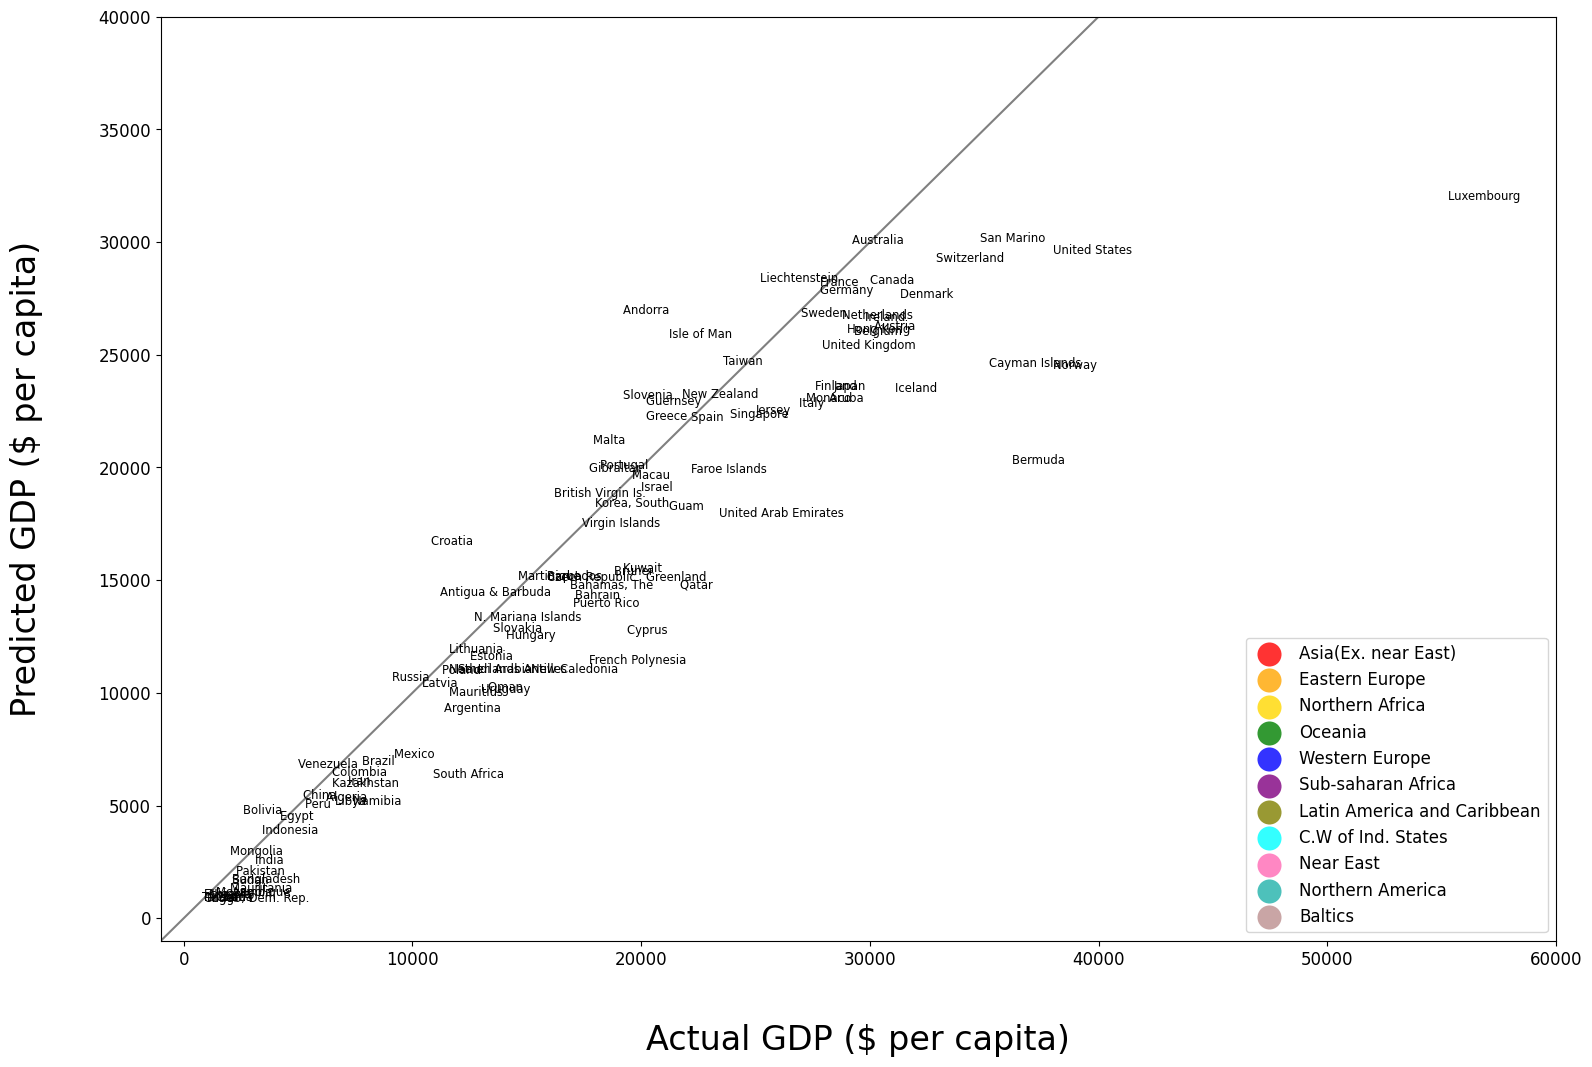

In [45]:
#visualization of results:
plt.figure(figsize=(18,12))


train_test_Y=pd.concat([train_Y,test_Y])
train_test_pred_Y=pd.concat([train_pred_Y,test_pred_Y],ignore_index=True)

data_shuffled=data.loc[train_test_Y.index]
label=data_shuffled['Country']

colors={
         'Asia(Ex. near East)':'red',
         'Eastern Europe':'orange',
         'Northern Africa':'gold',
         'Oceania':'green',
         'Western Europe':'blue',
         'Sub-saharan Africa':'purple',
         'Latin America and Caribbean':'olive',
         'C.W of Ind. States':'cyan',
         'Near East':'hotpink',
         'Northern America':'lightseagreen',
         'Baltics':'rosybrown'

}

for region,color in colors.items():
    X=train_test_Y.loc[data_shuffled['Region']==region]
    Y=train_test_pred_Y.loc[data_shuffled['Region']==region]
    ax=sns.regplot(x=X,y=Y,marker='.',fit_reg=False,color=color,scatter_kws={'s':1200,'linewidths':0},label=region)
plt.legend(loc=4,prop={'size':12})

ax.set_xlabel('Actual GDP ($ per capita)',labelpad=40)
ax.set_ylabel('Predicted GDP ($ per capita)',labelpad=40)
ax.xaxis.label.set_fontsize(24)
ax.yaxis.label.set_fontsize(24)
ax.tick_params(labelsize=12)

x=np.linspace(-1000,50000,100)
y=x
plt.plot(x,y,c='gray')

plt.xlim(-1000,60000)
plt.ylim(-1000,40000)

for i in range(0,train_test_Y.shape[0]):
    if((data_shuffled['Area (sq. mi.)'].iloc[i]>8e5)|(data_shuffled['Population'].iloc[i]>1e8)|(data_shuffled['GDP ($ per capita)'].iloc[i]>10000)):
        plt.text(train_test_Y.iloc[i]+200,train_test_pred_Y.iloc[i]-200,label.iloc[i],size='small')


In [50]:
data['Total_GDP ($)']=data['GDP ($ per capita)']* data['Population']
top_gdp_countries=data.sort_values('Total_GDP ($)',ascending=False).head(10)

In [51]:
top_gdp_countries.head(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Region_label,Climate_label,Total_GDP ($)
214,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,...,80.65,3.0,14.14,8.26,0.010,0.204,0.787,7,5,1.128119e+13
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.40,24.18,5000.0,90.9,...,83.35,1.5,13.25,6.97,0.125,0.473,0.403,0,2,6.569869e+12
103,Japan,ASIA (EX. NEAR EAST),127463611,377835,337.4,7.87,0.00,3.26,28200.0,99.0,...,86.85,3.0,9.37,9.16,0.017,0.258,0.725,0,5,3.594474e+12
94,India,ASIA (EX. NEAR EAST),1095351995,3287590,333.2,0.21,-0.07,56.29,2900.0,59.5,...,42.86,2.5,22.01,8.18,0.186,0.276,0.538,0,4,3.176521e+12
76,Germany,WESTERN EUROPE,82422299,357021,230.9,0.67,2.18,4.16,27600.0,99.0,...,65.56,3.0,8.25,10.62,0.009,0.296,0.695,10,5,2.274855e+12
69,France,WESTERN EUROPE,60876136,547030,111.3,0.63,0.66,4.26,27600.0,99.0,...,64.40,4.0,11.99,9.14,0.022,0.214,0.764,10,6,1.680181e+12
213,United Kingdom,WESTERN EUROPE,60609153,244820,247.6,5.08,2.19,5.16,27700.0,99.0,...,76.33,3.0,10.71,10.13,0.005,0.237,0.758,10,5,1.678874e+12
101,Italy,WESTERN EUROPE,58133509,301230,193.0,2.52,2.07,5.94,26700.0,98.6,...,62.68,0.0,8.72,10.40,0.021,0.291,0.688,10,0,1.552165e+12
27,Brazil,LATIN AMER. & CARIB,188078227,8511965,22.1,0.09,-0.03,29.61,7600.0,86.4,...,92.15,2.0,16.56,6.17,0.084,0.400,0.516,4,3,1.429395e+12
169,Russia,C.W. OF IND. STATES,142893540,17075200,8.4,0.22,1.02,15.39,8900.0,99.6,...,92.56,0.0,9.95,14.65,0.054,0.371,0.575,2,0,1.271753e+12


In [41]:
#Factors affecting Total GDP 
corr_to_gdp=pd.Series()
for col in data.columns.values[2:]:
    if((col!='Total GDP ($)')&(col!='Climate')&(col!='GDP ($ per capita)')):
        corr_to_gdp[col]=data['Total_GDP ($)'].corr(data[col])
abs_corr_to_gdp=corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp=corr_to_gdp.loc[abs_corr_to_gdp.index]
print(corr_to_gdp)

Total_GDP ($)                         1.000000
Population                            0.639529
Area (sq. mi.)                        0.556397
Phones (per 1000)                     0.234593
Birthrate                            -0.158137
Arable (%)                            0.131390
Agriculture                          -0.124659
Literacy (%)                          0.124395
Infant mortality (per 1000 births)   -0.119787
Service                               0.114477
Climate_label                         0.108033
Region_label                         -0.079746
Crops (%)                            -0.076937
Industry                              0.069920
Coastline (coast/area ratio)         -0.065208
Net migration                         0.054547
Other (%)                            -0.048235
Deathrate                            -0.029435
Pop. Density (per sq. mi.)           -0.028485
dtype: float64


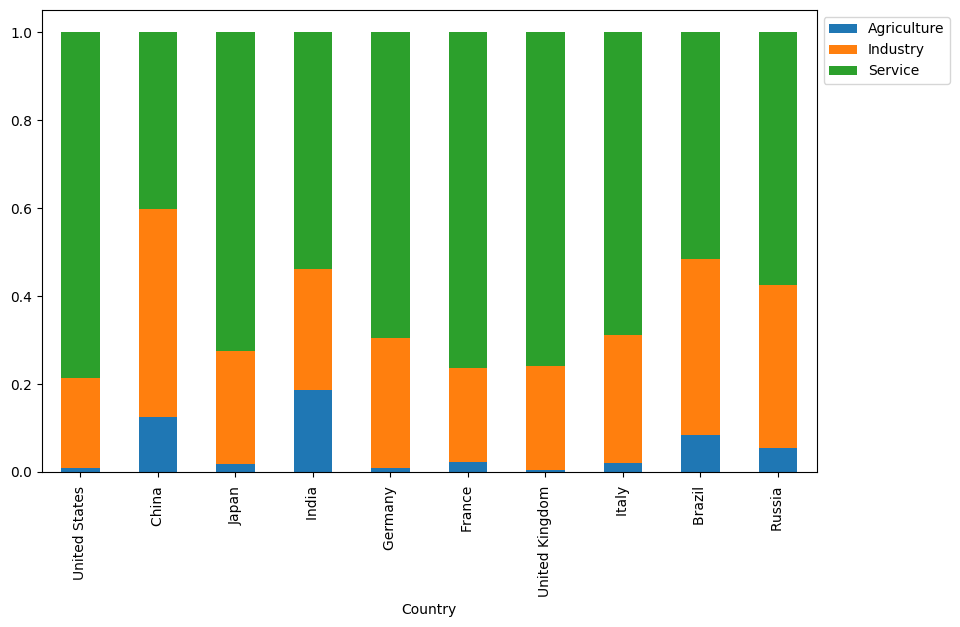

In [53]:
#comparison of economy structure of the Top 10 countries
plot_data=top_gdp_countries.head(10)[['Country','Agriculture','Industry','Service']]
plot_data=plot_data.set_index('Country')
ax=plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1,1))
plt.show()